In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df.shape

(500, 9)

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=['Serial No.'] , inplace=True)

In [11]:
X= df.iloc[:,0:-1]
y =df.iloc[:,-1]

In [50]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train, Y_test =train_test_split(X, y, test_size=0.2,random_state=42)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train , Y_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
#X_test_scaled

In [57]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [68]:
model = Sequential()
model.add(Dense(7 , activation='relu' , input_dim=7)) #here 7 is node in starting
model.add(Dense(7 , activation='relu' , input_dim=7)) #here 7 is node in starting
#out put layer 
model.add(Dense(1 , activation='linear'))  # always remember guys whenever their regression problem it output node ka  activation function should be linear 

In [69]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(loss='mean_squared_error' , optimizer='Adam')

In [71]:

history = model.fit(X_train_scaled , Y_train , epochs =1000 , validation_split=0.2)


Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.9919 - val_loss: 1.0486
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9064 - val_loss: 0.9357
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8444 - val_loss: 0.8376
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7217 - val_loss: 0.7512
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6381 - val_loss: 0.6667
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5749 - val_loss: 0.5681
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4675 - val_loss: 0.4277
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3162 - val_loss: 0.2669
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1929 - val_loss: 0.1376
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0937 - val_loss: 0.0560
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0341 - val_loss: 0.0238
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

In [72]:
y_pred =model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [73]:
from sklearn.metrics import r2_score
r2_score(Y_test , y_pred)

0.7973468527121674

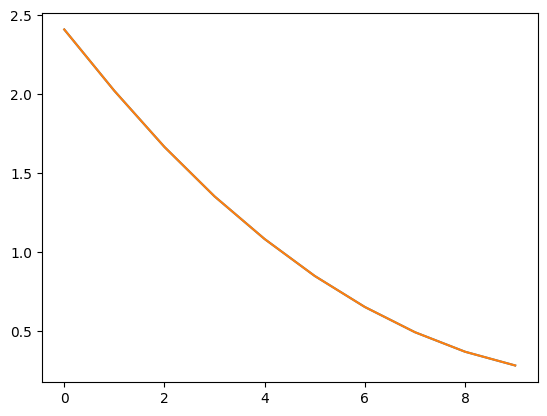

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])

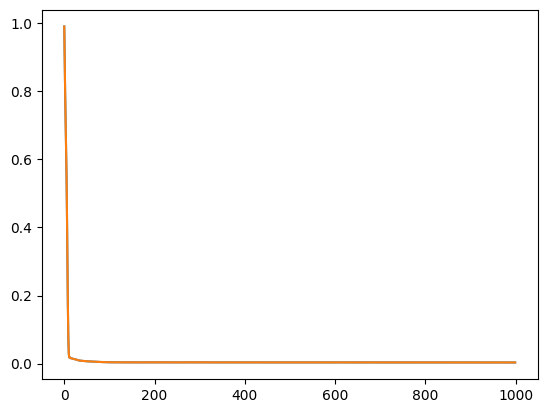

In [74]:
# these after adding new hidden layers and increasing epochs 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])